### Crédito Joven  Nafin analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_CreditoJoven.csv",  sep=';', encoding='cp1252')

In [5]:
df.head()

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
0,2016,2,1.- TU CREDITO PARA CRECER,1014000,JALISCO,60000.0,1,1
1,2017,11,2.- TU CREDITO PYME JOVEN,1007000,CHIAPAS,4500000.0,2,2
2,2016,7,2.- TU CREDITO PYME JOVEN,1011000,GUANAJUATO,2903000.0,4,4
3,2015,8,1.- TU CREDITO PARA CRECER,1007000,CHIAPAS,236000.0,1,1
4,2016,7,2.- TU CREDITO PYME JOVEN,1004000,CAMPECHE,2500000.0,1,1


### Basic statistics over the credit column  

In [6]:
df.loc[:,['Importe de los creditos']].describe()

,Importe de los creditos
count,1.478000e+03
mean,1.314402e+06
std,2.189663e+06
min,2.500000e+04
25%,2.132500e+05
50%,4.630000e+05
75%,1.465000e+06
max,2.007643e+07


In [7]:
# Maximun credit 
df['Importe de los creditos'].max()

20076428.57

In [8]:
df.loc[df['Importe de los creditos'] == df['Importe de los creditos'].max()]

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
1422,2017,11,2.- TU CREDITO PYME JOVEN,1021000,PUEBLA,20076428.57,14,14


In [9]:
# Minimum credit
df['Importe de los creditos'].min()

25000.0

In [10]:
df.loc[df['Importe de los creditos'] == df['Importe de los creditos'].min()]

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
164,2015,9,1.- TU CREDITO PARA CRECER,1015000,MEXICO,25000.0,1,1


### General graphics

In [27]:
# Products
products_group = df.groupby(['Productos'])['Numero de Creditos'].sum()
products_group

Productos
1.- TU CREDITO PARA CRECER     434
2.- TU CREDITO PYME JOVEN     1737
3.- INCUBACION EN LINEA       2895
4.- INCUBACION PRESENCIAL       64
Name: Numero de Creditos, dtype: int64

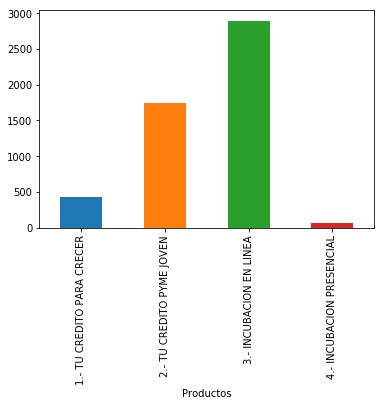

In [26]:
t.plot(kind ='bar')

In [24]:
index = ['TU CREDITO PARA CRECER', 'TU CREDITO PYME JOVEN', 'INCUBACION EN LINEA', 'INCUBACION PRESENCIAL']

In [25]:
values = [counter for counter in products_group_count]

In [26]:
products_df = pd.DataFrame({'Creditos otorgados': values}, index=index) 

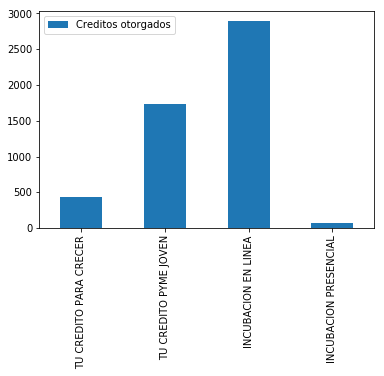

In [27]:
products_df.plot(kind='bar')

In [28]:
products_df.head()

,Creditos otorgados
TU CREDITO PARA CRECER,434
TU CREDITO PYME JOVEN,1737
INCUBACION EN LINEA,2895
INCUBACION PRESENCIAL,64


In [29]:
# Credits by State
state_group = df.groupby(['Estado'])['Numero de Creditos'].sum().sort_values
state_group

<bound method Series.sort_values of Estado
AGUASCALIENTES           102
BAJA CALIFORNIA NORTE    131
BAJA CALIFORNIA SUR       98
CAMPECHE                 251
CHIAPAS                   76
CHIHUAHUA                149
CIUDAD DE MEXICO         272
COAHUILA                 257
COLIMA                    34
DURANGO                  125
GUANAJUATO               152
GUERRERO                 139
HIDALGO                  239
JALISCO                  270
MEXICO                   358
MICHOACAN                222
MORELOS                   81
NAYARIT                  174
NUEVO LEON               293
OAXACA                   141
PUEBLA                   275
QUERETARO                144
QUINTANA ROO              46
SAN LUIS POTOSI           98
SINALOA                  404
SONORA                   106
TABASCO                   46
TAMAULIPAS               115
TLAXCALA                 101
VERACRUZ                 126
YUCATAN                   92
ZACATECAS                 13
Name: Numero de Creditos, dty

In [1]:
values = [counter for counter in state_group]

NameError: name 'state_group' is not defined

In [ ]:
states_index = list(df['Estado'].drop_duplicates())

In [ ]:
states_df = pd.DataFrame({'Creditos otorgados': values}, index=states_index)

In [ ]:
states_df.head(32)

In [ ]:
states_df.plot(kind='hist')

In [31]:
index = ['a', 'a', 'b', 'c']
df3 = pd.DataFrame({'data': [3, 2, 5, 6], 'letter': index})

In [32]:
df3

,data,letter
0,3,a
1,2,a
2,5,b
3,6,c


In [33]:
df3.groupby('letter')['data'].count()

letter
a    2
b    1
c    1
Name: data, dtype: int64

In [34]:
df3.groupby('letter')['data'].sum()

letter
a    5
b    5
c    6
Name: data, dtype: int64

In [35]:
df3['letter']

0    a
1    a
2    b
3    c
Name: letter, dtype: object

In [15]:
?pd.DataFrame.groupby

In [37]:
df4 = df3.copy()
df4['letter'].drop_duplicates()

0    a
2    b
3    c
Name: letter, dtype: object

In [11]:
14000/12

1166.6666666666667